# Earthquake risk in Greece

This project is quite different from a software development task.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter error will using the notebook.

In [1]:
%reload_ext autoreload
%autoreload 2

## Constraints

+ 🚨 Only cells with the comment `# NOTE: Fill me!` should be filled
+ 🚨 Notebook should be saved and commited **with** outputs for the submission


+ ⚠️ The solution only requires packages listed in the `requirements/requirements.txt`
+ ⚠️ Unit tests should be favored when asked to write tests 
+ ⚠️ Tests must automatically be detected running `pytest`
+ ⚠️ Requested method signature should be inferred from this notebook


## Note

+ The `assert` statements in the notebook are here to guide the project.
However, successful `assert` statements does not guaranty that your code is correct.

## Setup

In a Python >= 3.8 virtual env, run:

In [2]:
! pip install -r ../requirements/requirements.txt
! pip install --no-deps -e ..

Obtaining file:///C:/Users/feilo/PycharmProjects/descartes_underwriting_technical_test
  Attempting uninstall: earthquakes
    Found existing installation: earthquakes dev
    Uninstalling earthquakes-dev:
      Successfully uninstalled earthquakes-dev
  Running setup.py develop for earthquakes


In [3]:
## A DIRTY PRACTICE TO EASLILY IMPORT ALL PYTHON MODULES
import add_to_path

In [4]:
#! pip install -r ../requirements.txt


## Tests

In [5]:
! cd .. && pytest

============================= test session starts =============================
platform win32 -- Python 3.8.12, pytest-7.1.0, pluggy-1.0.0
rootdir: C:\Users\feilo\PycharmProjects\descartes_underwriting_technical_test
plugins: anyio-3.5.0, dash-2.3.0
collected 5 items

tests\src\earthquakes\test_tools.py ..                                   [ 40%]
tests\src\earthquakes\test_usgs_api.py ...                               [100%]

============================== 5 passed in 9.92s ==============================


---

# Context

A client asks for an insurance of their asset, located at `(35.025, 25.763)` in Greece.

The client wishes to receive a payout under the following conditions:

+ earthquake of magnitude `4.5` or higher within `10km`: full payout
+ earthquake of magnitude `5.5` or higher within `50km`: `75%` payout
+ earthquake of magnitude `6.5` or higher within `200km`: `50%` payout

In the event of aftershocks, a payout can only occur once a year using the maximal value.

## Example

If in the same year:

* an earthquake of magnitude `6.8` occurs within `200km`
* **and** an aftershock of magnitude `5.8` occurs within `50km`

the client receives a `75%` payout, and not a `125%` payout.

In [6]:
import numpy as np
import pandas as pd
from datetime import datetime

from earthquakes.tools import (
    DISTANCE_COLUMN,
    LATITUDE_COLUMN,
    LONGITUDE_COLUMN,
) 

# Earthquake data

The US Geological Service (USGS) provides CSV data through their [API](https://earthquake.usgs.gov/fdsnws/event/1/).

Use it to retrieve earthquake information.

In the module `earthquakes.usgs_api`:
+ Implement the function `get_earthquake_data`,
+ The function will retrieve the earthquake data of the area of interest for the past 200 years,
+ The implementation must use the `urllib` python package,
+ The API request url must be build in a dedicated function `build_api_url`,
+ Tests should be provided for `build_api_url`.

Note: Earthquakes after the 21-10-2021 should not be considered.

In [7]:
from earthquakes.usgs_api import get_earthquake_data

In [8]:
# NOTE: Fill me!



PROTECTION_LAYER_PARAMETERS = list()
PROTECTION_LAYER_PARAMETERS.append({"max_radius":10,"min_magnitude":4.5,"payout_ratio":1.0})
PROTECTION_LAYER_PARAMETERS.append({"max_radius":50,"min_magnitude":5.5,"payout_ratio":0.75})
PROTECTION_LAYER_PARAMETERS.append({"max_radius":200,"min_magnitude":6.5,"payout_ratio":0.5})



POLICY_LIMIT = 100.0 ##


latitude = 35.025
longitude = 25.763
radius = max([x["max_radius"] for x in PROTECTION_LAYER_PARAMETERS])
minimum_magnitude =  min([x["min_magnitude"] for x in PROTECTION_LAYER_PARAMETERS])

ASSET_LOCATION_PARAMETERS  = list()
ASSET_LOCATION_PARAMETERS.append({"latitude":latitude,"longitude":longitude})

latitude,longitude,radius,minimum_magnitude

(35.025, 25.763, 200, 4.5)

In [9]:
# NOTE: This request may take significant time (>10s)
earthquake_data = get_earthquake_data(
    latitude=latitude,
    longitude=longitude,
    radius=radius,
    minimum_magnitude=minimum_magnitude,
    end_date=datetime(year=2021, month=10, day=21)
)

In [10]:
assert isinstance(earthquake_data, pd.DataFrame)
assert len(earthquake_data) == 656

## Warning

The next test may fail because USGS regularly updates their earthquake database.

The dataframe obtained should over be similar to that presented bellow.

Please contact us if there is an error.

In [11]:
expected_earthquake_data = pd.DataFrame([
        ["2021-10-12T09:24:05.099Z", 35.1691, 26.2152, 20.0, 6.4, "mww", np.nan, 19.0, 0.860, 0.46,"us", "us6000ftxu", "2021-12-18T19:58:57.040Z", "4 km SW of Palekastro, Greece", "earthquake", 6.1, 1.8, 0.048, 42.0, "reviewed", "us", "us"],
        ["2021-10-03T14:31:27.622Z", 35.1442, 25.2375, 10.0, 4.6, "mb", np.nan, 119.0, 0.318, 0.64, "us", "us6000fsp1", "2021-12-10T21:14:19.040Z", "2 km W of Arkalochóri, Greece", "earthquake", 5.0, 1.9, 0.165, 13.0, "reviewed", "us", "us"],
        ["2021-09-29T11:54:48.885Z", 35.0268, 25.1561, 10.0, 4.6, "mb", np.nan, 69.0, 0.339, 0.83, "us", "us6000fq3y", "2021-12-04T14:27:58.040Z", "2 km N of Pýrgos, Greece", "earthquake", 5.1, 1.3, 0.068, 64.0, "reviewed", "us", "us"],
        ["2021-09-28T15:13:16.867Z", 35.2054, 25.2791, 10.0, 4.7, "mb", np.nan, 58.0, 0.329, 0.70, "us", "us7000ff84", "2021-12-04T14:30:09.040Z", "1 km N of Thrapsanón, Greece", "earthquake", 6.9, 1.8, 0.067, 73.0, "reviewed", "us", "us"],
        ["2021-09-28T04:48:08.650Z", 35.0817, 25.2018, 10.0, 5.3, "mww", np.nan, 43.0, 0.328, 0.94, "us", "us7000ff36", "2021-12-04T14:30:04.040Z", "9 km SW of Arkalochóri, Greece", "earthquake", 4.5, 1.7, 0.046, 45.0, "reviewed", "us", "us"],
    ],
    columns=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']
)

In [12]:
earthquake_data_sample = earthquake_data[
    earthquake_data["time"].isin(expected_earthquake_data["time"])
]
### THIS COMPARISON IS SENSENBLE BY INDEX ORDERS, STANDARDIZATION IS NEEDED IN MY CASE
pd.testing.assert_frame_equal(earthquake_data_sample.sort_values(by ="time").reset_index().drop("index",axis = 1), expected_earthquake_data.sort_values(by ="time").reset_index().drop("index",axis = 1))

# Distance

We wish to compute the the historical payouts (i.e. the payouts that would have occurred for the past 200 years).

To compute the historical payouts, we need to know the distance between each earthquake and our client's asset.

The distance between two points on a sphere is the [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula). In the module `eathquakes.tools`:
- Implement and test the function `get_haversine_distance`,
- Use `earthquakes.tools.EARTH_RADIUS` (6378km) as an approximation of the radius of Earth.

In [13]:
from earthquakes.tools import get_haversine_distance

distances = get_haversine_distance(earthquake_data[LATITUDE_COLUMN], earthquake_data[LONGITUDE_COLUMN], latitude, longitude)

earthquake_data[DISTANCE_COLUMN] = distances

## Historical payouts and burning costs

### Payout

The historical payouts are a map `year -> payout in %`.

eg: `1950: 50` for a payout of `50%` in 1950.

Payouts are NOT given per event, but per year.

This map can take the form of a python `dict` or of a pandas `Series`. 

### Burning cost

The `burning cost` is the average of payouts over a time range.

In this project, the burning cost should be expressed in `%`. 

### Payout structure

The payout structure is:

| Radius | Magnitude | Payout |
|--------|-----------|--------|
| 10km   | 4.5       | 100 %  |
| 50km   | 5.5       |  75 %  |
| 200km  | 6.5       |  50 %  |

Payouts can occur only once in a given year.

In the module `earthquakes.tools`:
+ Implement the functions `compute_payouts` and `compute_burning_cost`,
+ Tests for these functions are not required.

### Example

A payout `{1950: 50, 1992: 75}` means that we would have paid our client
+ in 1950, for `50%` of the insured amount (called 'limit')
+ in 1992, for `75%` of the limit

The burning cost over the `1922-2021` period would be `1.25%`.

The burning cost over the `1972-2021` period would be `1.5%`.

In [14]:
from earthquakes.tools import compute_payouts, compute_burning_cost

In [15]:
# NOTE: Fill me!
import importlib
from src.earthquakes.tools import earthquake_policy_module
importlib.reload(earthquake_policy_module)

### PROTECTION LAYER CREATION

### ASSET LOCATION 
protection_layers = []
for index_, layer in enumerate(PROTECTION_LAYER_PARAMETERS):
    protection_layers.append(
            earthquake_policy_module.EarthquakeProtectionLayer(layer_id=index_, max_radius=layer["max_radius"],
                                                                     min_magnitude=layer["min_magnitude"],
                                                                     payout_ratio=layer["payout_ratio"]))
asset_locations = list()
for index_, location in enumerate(ASSET_LOCATION_PARAMETERS):
    asset_locations.append({"latitude": location["latitude"],
            "longitude": location["longitude"]
        })
reporting_levels = [earthquake_policy_module.ReportingLevel.EVENT,
                        earthquake_policy_module.ReportingLevel.EVENT_LAYER]

policy = earthquake_policy_module.MultiAssetEarthquakePolicy(policy_id=1,
                                                                       policy_name="GREECE EARTHQUAKE TEST",
                                                                       asset_locations=asset_locations,
                                                                       protection_layers=protection_layers,
                                                                       limit=POLICY_LIMIT,
                                                                       reporting_levels=reporting_levels)

### GENERATE POLICY OBJECT


payout_structure = policy

In [16]:
### THE RESULT IS AN EXTENSION OF A pandas.Series with detailed_analysis and event_data as additional field
### This will not affect the common behavior of a pandas.Series object
payouts = compute_payouts(earthquake_data, payout_structure)

                         time  latitude  longitude  depth  mag magType  nst  \
0    1911-04-04T15:43:47.000Z   36.4060    25.8840   15.0  6.0      mw  NaN   
1    1922-08-11T08:19:41.000Z   34.9890    27.1760   20.0  6.3      mw  NaN   
2    1922-08-13T00:09:55.000Z   35.3240    27.5470   15.0  6.7      mw  NaN   
3    1923-08-01T08:16:27.000Z   34.7860    25.1600   15.0  5.6      mw  NaN   
4    1948-02-09T12:58:18.000Z   35.6310    27.1530   15.0  7.3      mw  NaN   
..                        ...       ...        ...    ...  ...     ...  ...   
651  2021-09-28T04:48:08.650Z   35.0817    25.2018   10.0  5.3     mww  NaN   
652  2021-09-28T15:13:16.867Z   35.2054    25.2791   10.0  4.7      mb  NaN   
653  2021-09-29T11:54:48.885Z   35.0268    25.1561   10.0  4.6      mb  NaN   
654  2021-10-03T14:31:27.622Z   35.1442    25.2375   10.0  4.6      mb  NaN   
655  2021-10-12T09:24:05.099Z   35.1691    26.2152   20.0  6.4     mww  NaN   

       gap   dmin   rms  ...                       

In [17]:
payouts.detailed_analysis

1911    <core.financial_modelling.scenario_payout.base...
1922    <core.financial_modelling.scenario_payout.base...
1923    <core.financial_modelling.scenario_payout.base...
1948    <core.financial_modelling.scenario_payout.base...
1950    <core.financial_modelling.scenario_payout.base...
                              ...                        
2017    <core.financial_modelling.scenario_payout.base...
2018    <core.financial_modelling.scenario_payout.base...
2019    <core.financial_modelling.scenario_payout.base...
2020    <core.financial_modelling.scenario_payout.base...
2021    <core.financial_modelling.scenario_payout.base...
Length: 68, dtype: object

In [18]:
# Depending on the return type of compute_payouts, the following line needs to be adjusted.
# - pd.Series:
payout_values = np.array(payouts.values)
# - dict:
# payout_values = np.array(list(payouts.values()))
assert np.max(payout_values) > 1
assert np.max(payout_values) <= 100

In [19]:
burning_cost = compute_burning_cost(payouts, start_year=1952, end_year=2021)

In [20]:
np.testing.assert_allclose(burning_cost, 10.71, atol=1e-2)

In [21]:
import matplotlib.pyplot as plt

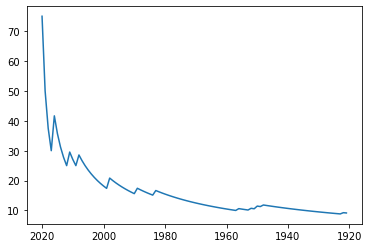

In [22]:
years = range(1921, 2021)
plt.plot(
    years, 
    [
        compute_burning_cost(payouts, start_year=start_year, end_year=2021) 
        for start_year in years
    ]
)
plt.gca().invert_xaxis()

# Large asset portfolio - async requests

Our client also whishes to cover a large amount of properties all over Europe.

In order to speed-up the requests to the USGS API, in the module `earthquakes.usgs_api`:
- Implement the `async` function `get_earthquake_data_for_multiple_locations`,
- The implementation should use the `asyncio` and `aiohttp` libraries,
- The solution should re-use some of the functions already written,
- Tests are not required for any of the functions.

Note: it is possible that the notebook autoreload feature doesn't work for `async` functions - a kernel restart may be necessary after each modifications.

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime

from earthquakes.tools import (
    LATITUDE_COLUMN,
    LONGITUDE_COLUMN,
)

In [24]:
number_of_assets = 10
# NOTE: limiting to number of assets so that the query doesn't take too long.

In [25]:
random_state = np.random.RandomState(0)

random_values = random_state.random(2*number_of_assets)

latitudes = random_values[::2] * 20 + 35.0
longitudes = random_values[1::2] * 25 + 3.0

In [26]:
from earthquakes.usgs_api import get_earthquake_data_for_multiple_locations

In [27]:
# NOTE: Fill me!
assets = [{"latitude":latitude,"longitude":longitude} for (latitude,longitude) in zip(latitudes,longitudes)]
assets

[{'latitude': 45.97627007854649, 'longitude': 20.879734159310487},
 {'latitude': 47.05526752143288, 'longitude': 16.622079574922424},
 {'latitude': 43.47309598677809, 'longitude': 19.147352826666403},
 {'latitude': 43.75174422525385, 'longitude': 25.294325019551994},
 {'latitude': 54.27325521002059, 'longitude': 12.586037970644442},
 {'latitude': 50.83450076165329, 'longitude': 16.22237299382261},
 {'latitude': 46.360891221878646, 'longitude': 26.139915957316525},
 {'latitude': 36.42072116395774, 'longitude': 5.178232492538518},
 {'latitude': 35.40436794880652, 'longitude': 23.81549613869845},
 {'latitude': 50.56313501899701, 'longitude': 24.750303706170477}]

In [48]:
### JUPYTER NOTEBOOK IS ALREADY IN AN EVENT LOOP, WHICH PREVENTS ME FROM CALLING multi asset data colecting function (based on asyncio)
### There are different solutions for this, I choose the one that is most simple for me (as I am quite new to usage of asyncio)
### https://exerror.com/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop/


In [44]:
pip install nest_asyncio

Note: you may need to restart the kernel to use updated packages.


In [45]:
# NOTE: This request may take significant time (>10s)

import nest_asyncio
nest_asyncio.apply()
import asyncio
loop = asyncio.new_event_loop()


multi_earthquake_data = get_earthquake_data_for_multiple_locations(
        assets, 
    radius=200, 
    minimum_magnitude=4.5, 
    end_date=datetime(year=2021, month=10, day=21)
)

In [46]:
multi_earthquake_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1913-06-14T09:33:19.000Z,43.603,25.952,15.0,6.6,mw,NaN,NaN,NaN,NaN,...,2020-07-10T13:26:38.886Z,"6 km E of Dve Mogili, Bulgaria",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1,1923-08-01T08:16:27.000Z,34.786,25.16,15.0,5.6,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:41.000Z,"24 km S of Pýrgos, Greece",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
2,1926-08-30T11:38:04.000Z,36.57,22.995,50.0,6.3,mw,NaN,NaN,NaN,NaN,...,2020-07-10T12:19:25.180Z,"13 km SSW of Géfyra, Greece",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1928-04-14T09:00:00.000Z,42.329,25.717,10.0,7.1,mw,NaN,NaN,NaN,NaN,...,2020-07-10T11:57:18.658Z,"13 km SSE of Stara Zagora, Bulgaria",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1928-04-18T19:22:56.000Z,42.356,25.109,15.0,7.1,mw,NaN,NaN,NaN,NaN,...,2020-07-10T11:57:53.506Z,"2 km ENE of Brezovo, Bulgaria",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2021-09-28T04:48:08.650Z,35.0817,25.2018,10.0,5.3,mww,NaN,43.0,0.328,0.94,...,2021-12-04T14:30:04.040Z,"9 km SW of Arkalochóri, Greece",earthquake,4.5,1.7,0.046,45.0,reviewed,us,us
1032,2021-09-28T15:13:16.867Z,35.2054,25.2791,10.0,4.7,mb,NaN,58.0,0.329,0.7,...,2021-12-04T14:30:09.040Z,"1 km N of Thrapsanón, Greece",earthquake,6.9,1.8,0.067,73.0,reviewed,us,us
1033,2021-09-29T11:54:48.885Z,35.0268,25.1561,10.0,4.6,mb,NaN,69.0,0.339,0.83,...,2021-12-04T14:27:58.040Z,"2 km N of Pýrgos, Greece",earthquake,5.1,1.3,0.068,64.0,reviewed,us,us
1034,2021-10-03T14:31:27.622Z,35.1442,25.2375,10.0,4.6,mb,NaN,119.0,0.318,0.64,...,2021-12-10T21:14:19.040Z,"2 km W of Arkalochóri, Greece",earthquake,5.0,1.9,0.165,13.0,reviewed,us,us


In [47]:
assert isinstance(multi_earthquake_data, pd.DataFrame)
assert len(multi_earthquake_data) == 1036